In [1]:
import csv
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt

rawTLX = pd.read_csv('HauptstudieTLX_RAW.csv')
weightsTLX = pd.read_csv('HauptstudieTLX_weights.csv')
weightedTLX = pd.read_csv("HauptstudieTLX_Weighted.csv")

# Ausschnitte von vorher verwendetem Code zur erstellung von tabellen oder columns in tabellen.

## Zelle1
rawTLX["overallScore"] = rawTLX['mental_demand'] + rawTLX["physical_demand"] + rawTLX['temporal_demand'] + rawTLX["performance"] + rawTLX['effort'] + rawTLX["frustration"]
rawTLX["overallScore"] = rawTLX["overallScore"]/6
rawTLX.to_csv('HauptstudieTLX_RAW.csv', index=False)
<br>
<br>

### Join und For Schleife zum testen auf fehler
weighted_scores = rawTLX.join(weightsTLX, lsuffix='_caller', rsuffix='_other')
#print(weighted_scores)
for index, row in weighted_scores.iterrows():
    if(row["participant_id_caller"] != row["participant_id_other"]):
        print("ID error")
    elif(row["trial_caller"] != row["trial_other"]):
        print("TRIAL ERROR")
        
### Da keine prints von der For schleife können die columns entfernt werden.        
weighted_scores = weighted_scores.drop(columns =["participant_id_other"])
weighted_scores = weighted_scores.drop(columns =["trial_other"])
weighted_scores = weighted_scores.drop(columns =["overallScore"])
weighted_scores.columns
weighted_scores.to_csv("combinedWeightsAndScores.csv")

### Berechnen der weighted scores und weighted total score
weighted_scores["mental_weighted"] = weighted_scores["mental_demand"]*weighted_scores["mental_demand_weight"]
weighted_scores["physical_weighted"] = weighted_scores["physical_demand"]*weighted_scores["physical_demand_weight"]
weighted_scores["temporal_weighted"] = weighted_scores["temporal_demand"]*weighted_scores["temporal_demand_weight"]
weighted_scores["performance_weighted"] = weighted_scores["performance"]*weighted_scores["performance_weight"]
weighted_scores["effort_weighted"] = weighted_scores["effort"]*weighted_scores["effort_weight"]
weighted_scores["frustration_weighted"] = weighted_scores["frustration"]*weighted_scores["frustration_weight"]


weighted_scores["overallScoreRAW"] = weighted_scores['mental_demand'] + weighted_scores["physical_demand"] + weighted_scores['temporal_demand'] + weighted_scores["performance"] + weighted_scores['effort'] + weighted_scores["frustration"]
weighted_scores["overallScoreRAW"] = weighted_scores["overallScoreRAW"]/6

weighted_scores["overallScoreWeighted"] = weighted_scores['mental_weighted'] + weighted_scores["physical_weighted"] + weighted_scores['temporal_weighted'] + weighted_scores["performance_weighted"] + weighted_scores['effort_weighted'] + weighted_scores["frustration_weighted"]
weighted_scores["overallScoreWeighted"] = weighted_scores["overallScoreWeighted"]/15
weighted_scores.to_csv("NASATLX_fullData.csv")

weighted_scores = weighted_scores.drop(columns = ["mental_demand", "mental_demand_weight", "physical_demand", "physical_demand_weight", "temporal_demand", "temporal_demand_weight", "performance", "performance_weight", "effort","effort_weight", "frustration", "frustration_weight", "overallScoreRAW"])
weighted_scores.to_csv("HauptstudieTLX_Weighted.csv", index=False)

       overallScore  overallScoreWeighted
trial                                    
 MM       28.333333             29.380952
 MSt      14.523810             15.428571
 SM       40.833333             45.857143
 SSt      12.976190             12.857143


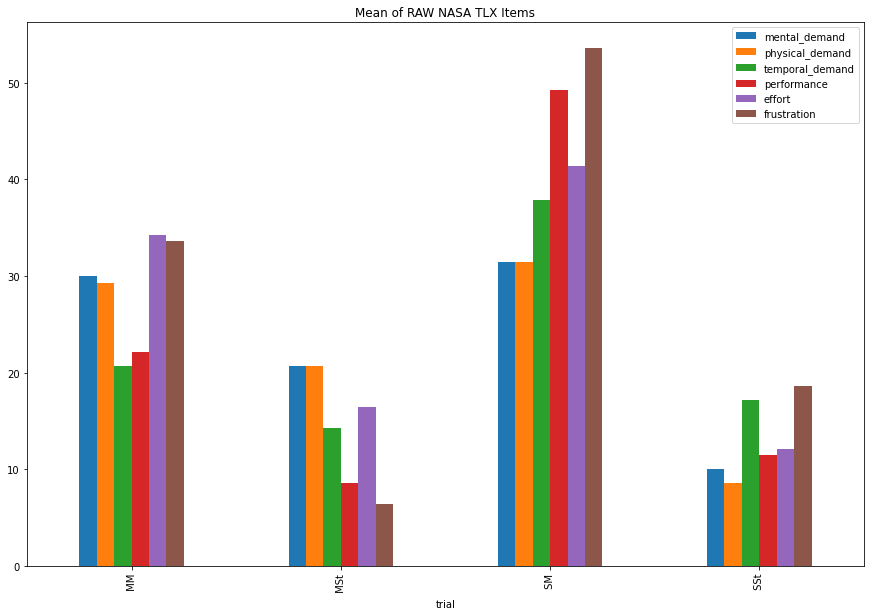

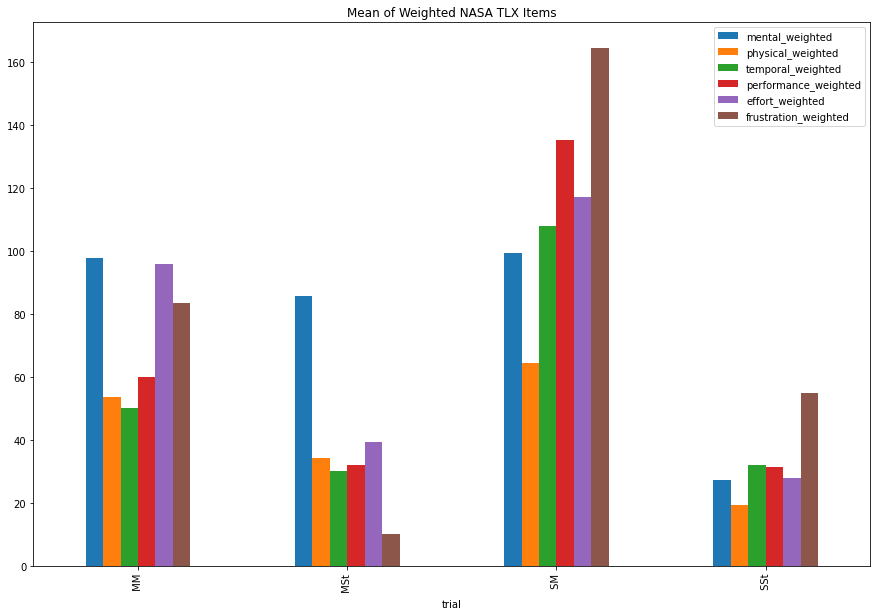

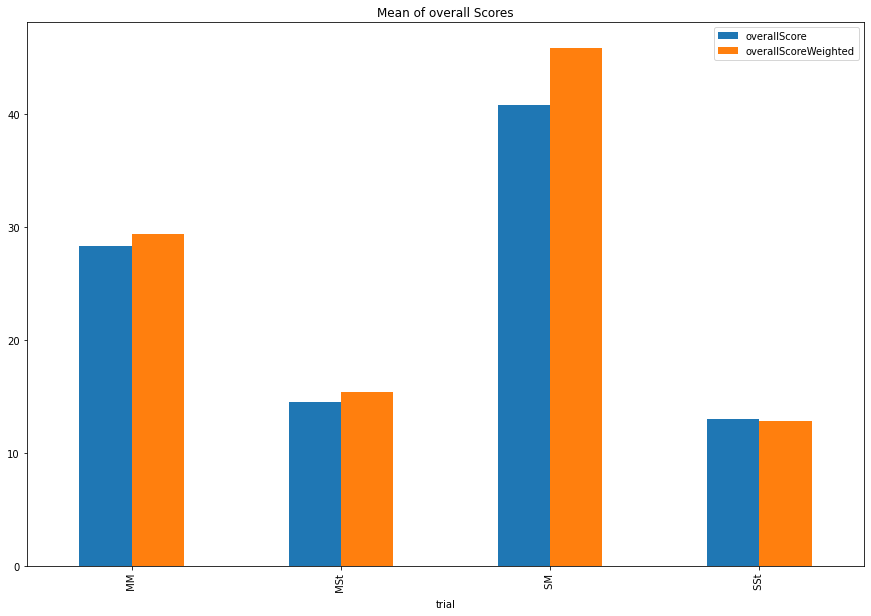

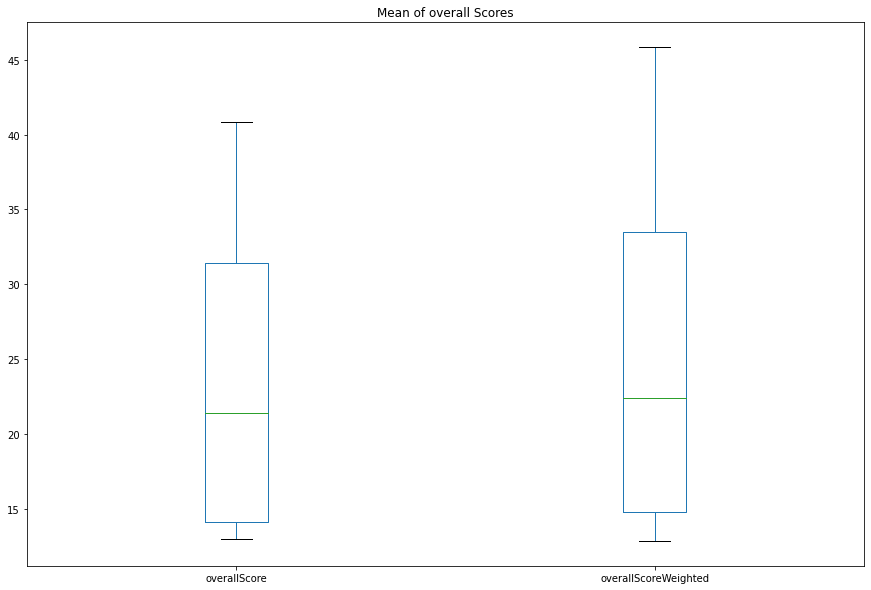

In [6]:
means_raw = rawTLX.drop(["overallScore"], axis = 1)
means_raw = means_raw.groupby(["trial"]).mean()
means_raw.plot.bar(figsize = (15, 10), title="Mean of RAW NASA TLX Items")

means_weighted = weightedTLX.drop(["overallScoreWeighted"], axis = 1)
means_weighted = means_weighted.groupby(["trial_caller"]).mean()
weightedPlot = means_weighted.plot.bar(figsize = (15, 10), title="Mean of Weighted NASA TLX Items")
weightedPlot.set_xlabel("trial")

overallScores = rawTLX.drop(["mental_demand"], axis = 1)
overallScores = overallScores.drop(["physical_demand"], axis = 1)
overallScores = overallScores.drop(["temporal_demand"], axis = 1)
overallScores = overallScores.drop(["effort"], axis = 1)
overallScores = overallScores.drop(["performance"], axis = 1)
overallScores = overallScores.drop(["frustration"], axis = 1)
overallScores["overallScoreWeighted"] = weightedTLX["overallScoreWeighted"]
overallPlot = overallScores.groupby(["trial"]).mean()
overallPlot.plot.bar(figsize = (15, 10), title="Mean of overall Scores")
overallPlot.plot.box(figsize = (15, 10), title="Mean of overall Scores")
print(overallPlot)

## Mittelwerte der ungewichteten NASA-TLX Fragebögen


In [15]:
# Quelle: https://machinelearningmastery.com/effect-size-measures-in-python/
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
# calculate the size of samples
    n1 = len(d1)
    n2 = len(d2)
# calculate the variance of the samples
    s1 = np.var(d1, ddof=1)
    s2 = np.var(d2, ddof=1)
# calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
# calculate the means of the samples
    u1 = np.mean(d1)
    u2 = np.mean(d2)
# calculate the effect size
    return (u1 - u2) / s



def splitByTrialRAW(table, trial):
    l1 = table.drop(table.loc[table["trial"] != trial].index)
    return l1

def splitByTrialWeighted(table, trial):
    l1 = table.drop(table.loc[table["trial_caller"] != trial].index)
    return l1

def kruskalTest(trial1, trial2, trial3, trial4, TLXitem):
    c1 = trial1[TLXitem].tolist()
    c2 = trial2[TLXitem].tolist()
    c3 = trial3[TLXitem].tolist()
    c4 = trial4[TLXitem].tolist()
    print(TLXitem)
    response = stats.kruskal(c1, c2, c3, c4)
    return response


#KORREKTE REIHENFOLGE ZWINGEND BEACHTEN
def whitneyPairwise(trialSST, trialMST, trialSM, trialMM, TLXitem):
    tempSST = trialSST[TLXitem].tolist()
    tempMST = trialMST[TLXitem].tolist()
    tempSM = trialSM[TLXitem].tolist()
    tempMM = trialMM[TLXitem].tolist()
    print("Paarweise Mann-Whitney-U Tests für folgendes NASA TLX Item: " + TLXitem)
    print("")    
    print("SM-SST: ")
    print(stats.mannwhitneyu(tempSM, tempSST, alternative="two-sided"))
    print("")
    print("SM-MST: ")
    print(stats.mannwhitneyu(tempSM, tempMST, alternative="two-sided"))
    print("")
    print("SM-MM: ")
    print(stats.mannwhitneyu(tempSM, tempMM, alternative="two-sided"))
    print("")
    print("MM-SST: ")
    print(stats.mannwhitneyu(tempMM, tempSST, alternative="two-sided"))
    print("")
    print("MM-MSt: ")
    print(stats.mannwhitneyu(tempMM, tempMST, alternative="two-sided"))
    print("")
    print("SST-MST: ")
    print(stats.mannwhitneyu(tempSST, tempMST, alternative="two-sided"))
    print("")


In [12]:
# Tolist zur verwendung von scipys test methoden
rawMental = rawTLX["mental_demand"].tolist()
rawPhys = rawTLX["physical_demand"].tolist()
rawTemp = rawTLX["temporal_demand"].tolist()
rawPerf = rawTLX["performance"].tolist()
rawEff = rawTLX["effort"].tolist()
rawFrust = rawTLX["frustration"].tolist()

weightedMental = weightedTLX["mental_weighted"].tolist()
weightedPhys = weightedTLX["physical_weighted"].tolist()
weightedTemp = weightedTLX["temporal_weighted"].tolist()
weightedPerf = weightedTLX["performance_weighted"].tolist()
weightedEff = weightedTLX["effort_weighted"].tolist()
weightedFrust = weightedTLX["physical_weighted"].tolist()



print ("RAW Mental Demand; " + str(stats.shapiro(rawMental)))
print ("RAW Phsysical Demand; " + str(stats.shapiro(rawPhys)))
print ("RAW Temporal Demand; " + str(stats.shapiro(rawTemp)))
print ("RAW Performance; " + str(stats.shapiro(rawPerf)))
print ("RAW Effort; " + str(stats.shapiro(rawEff)))
print ("RAW Frustration; " + str(stats.shapiro(rawFrust)))

print("")
print("")

print ("weighted Mental Demand; " + str(stats.shapiro(weightedMental)))
print ("weighted Phsysical Demand; " + str(stats.shapiro(weightedPhys)))
print ("weighted Temporal Demand; " + str(stats.shapiro(weightedTemp)))
print ("weighted Performance; " + str(stats.shapiro(weightedPerf)))
print ("weighted Effort; " + str(stats.shapiro(weightedEff)))
print ("weighted Frustration; " + str(stats.shapiro(weightedFrust)))

RAW Mental Demand; ShapiroResult(statistic=0.8120342493057251, pvalue=0.00017529736214783043)
RAW Phsysical Demand; ShapiroResult(statistic=0.7580426335334778, pvalue=2.1145875507500023e-05)
RAW Temporal Demand; ShapiroResult(statistic=0.8122447729110718, pvalue=0.000176849658600986)
RAW Performance; ShapiroResult(statistic=0.7978456020355225, pvalue=9.783103450899944e-05)
RAW Effort; ShapiroResult(statistic=0.7991309762001038, pvalue=0.00010304997704224661)
RAW Frustration; ShapiroResult(statistic=0.7214075326919556, pvalue=5.802929990750272e-06)


weighted Mental Demand; ShapiroResult(statistic=0.7764322757720947, pvalue=4.2148509237449616e-05)
weighted Phsysical Demand; ShapiroResult(statistic=0.7009415626525879, pvalue=2.93785342364572e-06)
weighted Temporal Demand; ShapiroResult(statistic=0.6339412927627563, pvalue=3.767929115383595e-07)
weighted Performance; ShapiroResult(statistic=0.7890164852142334, pvalue=6.876606494188309e-05)
weighted Effort; ShapiroResult(statistic=0.817078

Alle Daten sind NICHT normalverteilt (e-6 etc.)

In [21]:
rawSST = splitByTrialRAW(rawTLX, " SSt")
rawMST = splitByTrialRAW(rawTLX, " MSt")
rawSM = splitByTrialRAW(rawTLX, " SM")
rawMM = splitByTrialRAW(rawTLX, " MM")

weightedSST = splitByTrialWeighted(weightedTLX, " SSt")
weightedMST = splitByTrialWeighted(weightedTLX, " MSt")
weightedSM = splitByTrialWeighted(weightedTLX, " SM")
weightedMM = splitByTrialWeighted(weightedTLX, " MM")

overallSST = splitByTrialRAW(overallScores, " SSt")
overallMST = splitByTrialRAW(overallScores, " MSt")
overallSM = splitByTrialRAW(overallScores, " SM")
overallMM = splitByTrialRAW(overallScores, " MM")

In [16]:
print(kruskalTest(rawSST, rawMST, rawSM, rawMM, "mental_demand"))
print("")
print(kruskalTest(rawSST, rawMST, rawSM, rawMM, "physical_demand"))
print("")
print(kruskalTest(rawSST, rawMST, rawSM, rawMM, "temporal_demand"))
print("")
print(kruskalTest(rawSST, rawMST, rawSM, rawMM, "performance"))
print("")
print(kruskalTest(rawSST, rawMST, rawSM, rawMM, "effort"))
print("")
print(kruskalTest(rawSST, rawMST, rawSM, rawMM, "frustration"))

mental_demand
KruskalResult(statistic=5.88004362050162, pvalue=0.11759447084353393)

physical_demand
KruskalResult(statistic=5.366124893071, pvalue=0.1468687381513827)

temporal_demand
KruskalResult(statistic=4.004618659383903, pvalue=0.2609658298879416)

performance
KruskalResult(statistic=14.979228362877992, pvalue=0.0018344860704043494)

effort
KruskalResult(statistic=10.42283789743796, pvalue=0.015293572610006467)

frustration
KruskalResult(statistic=9.302094522019338, pvalue=0.025532674450149444)


Der Krusall Wallis Test zeigt statistisch signifikante ergebnisse für die items  performance(p=0.002), effort(p=0.015) und Frustration(p=0.026), hier werden nun paarweise Mann-whitney-u tests durchgeführt um 

In [36]:
whitneyPairwise(rawSST, rawMST, rawSM, rawMM, "performance")

Paarweise Mann-Whitney-U Tests für folgendes NASA TLX Item: performance

SM-SST: 
MannwhitneyuResult(statistic=48.0, pvalue=0.00289786085993019)

SM-MST: 
MannwhitneyuResult(statistic=49.0, pvalue=0.0016691366108996144)

SM-MM: 
MannwhitneyuResult(statistic=42.0, pvalue=0.02930367609770379)

MM-SST: 
MannwhitneyuResult(statistic=32.5, pvalue=0.316813648059063)

MM-MSt: 
MannwhitneyuResult(statistic=36.0, pvalue=0.13240107817845542)

SST-MST: 
MannwhitneyuResult(statistic=28.5, pvalue=0.6016896118647674)



Signifikante Unterschiede in der "performance" nach nasatlx zwischen den gruppen SM-SST (p=0,003), SM-MST (p=0,002) und SM-MM (p=0.029).

In [24]:
print("Performance")
print("SM-SST")
print(cohend(rawSST["performance"].tolist(), rawSM["performance"].tolist()))
print("")
print("SM-MST")
print(cohend(rawMST["performance"].tolist(), rawSM["performance"].tolist()))
print("")
print("SM-MM")
print(cohend(rawMM["performance"].tolist(), rawSM["performance"].tolist()))

Performance
SM-SST
-2.352652836577919

SM-MST
-2.686011133727992

SM-MM
-1.2493197572606554


In [37]:
whitneyPairwise(rawSST, rawMST, rawSM, rawMM, "effort")

Paarweise Mann-Whitney-U Tests für folgendes NASA TLX Item: effort

SM-SST: 
MannwhitneyuResult(statistic=45.5, pvalue=0.008296020121700134)

SM-MST: 
MannwhitneyuResult(statistic=42.5, pvalue=0.024388152236459282)

SM-MM: 
MannwhitneyuResult(statistic=30.5, pvalue=0.4773218662995383)

MM-SST: 
MannwhitneyuResult(statistic=40.0, pvalue=0.0486600208029437)

MM-MSt: 
MannwhitneyuResult(statistic=37.0, pvalue=0.11852482395457235)

SST-MST: 
MannwhitneyuResult(statistic=22.0, pvalue=0.7933505521096174)



Signifikante Unterschiede im "effort" nach nasatlx zwischen den gruppen SM-SST (p=0.008), SM-MST (p=0.024) und MM-SST (p=0,049)

In [25]:
print("Effort")
print("SM-SST")
print(cohend(rawSST["effort"].tolist(), rawSM["effort"].tolist()))
print("")
print("SM-MST")
print(cohend(rawMST["effort"].tolist(), rawSM["effort"].tolist()))
print("")
print("MM-SST")
print(cohend(rawMM["effort"].tolist(), rawSST["effort"].tolist()))

Effort
SM-SST
-1.732566222193459

SM-MST
-1.3173978860172217

MM-SST
0.9769737639641399


In [38]:
whitneyPairwise(rawSST, rawMST, rawSM, rawMM, "frustration")

Paarweise Mann-Whitney-U Tests für folgendes NASA TLX Item: frustration

SM-SST: 
MannwhitneyuResult(statistic=40.0, pvalue=0.04944702233971142)

SM-MST: 
MannwhitneyuResult(statistic=45.0, pvalue=0.006353558475219156)

SM-MM: 
MannwhitneyuResult(statistic=33.0, pvalue=0.3007681842390252)

MM-SST: 
MannwhitneyuResult(statistic=29.5, pvalue=0.5386963736282688)

MM-MSt: 
MannwhitneyuResult(statistic=36.5, pvalue=0.08633571786458005)

SST-MST: 
MannwhitneyuResult(statistic=32.5, pvalue=0.22919140659906345)



signifikante Unterschiede in der "frustration" nach nasatlx zwischen den gruppen SM-SST (p=0.049) und SM-MST (p=0.006).

In [26]:
print("Frustration")
print("SM-SST")
print(cohend(rawSST["frustration"].tolist(), rawSM["frustration"].tolist()))
print("")
print("SM-MST")
print(cohend(rawMST["frustration"].tolist(), rawSM["frustration"].tolist()))
print("")

Frustration
SM-SST
-1.0813501661433182

SM-MST
-1.748689525877895



In [17]:
print(kruskalTest(weightedSST, weightedMST, weightedSM, weightedMM, "mental_weighted"))
print("")
print(kruskalTest(weightedSST, weightedMST, weightedSM, weightedMM, "physical_weighted"))
print("")
print(kruskalTest(weightedSST, weightedMST, weightedSM, weightedMM, "temporal_weighted"))
print("")
print(kruskalTest(weightedSST, weightedMST, weightedSM, weightedMM, "performance_weighted"))
print("")
print(kruskalTest(weightedSST, weightedMST, weightedSM, weightedMM, "effort_weighted"))
print("")
print(kruskalTest(weightedSST, weightedMST, weightedSM, weightedMM, "frustration_weighted"))

mental_weighted
KruskalResult(statistic=3.45112781954887, pvalue=0.32715621456142613)

physical_weighted
KruskalResult(statistic=1.9945965133706651, pvalue=0.5735289755449788)

temporal_weighted
KruskalResult(statistic=1.2792749821130356, pvalue=0.734060221270403)

performance_weighted
KruskalResult(statistic=15.208382358907773, pvalue=0.0016469591162221167)

effort_weighted
KruskalResult(statistic=11.369936034115145, pvalue=0.009884796473033926)

frustration_weighted
KruskalResult(statistic=6.545881126173089, pvalue=0.0878705218394599)


Performance und Effort haben beim Kruskall Wallis Testein signifikantes Ergebnis -> paarweise mann whitney tests zur genaueren feststellung

In [42]:
whitneyPairwise(weightedSST, weightedMST, weightedSM, weightedMM, "performance_weighted")

Paarweise Mann-Whitney-U Tests für folgendes NASA TLX Item: performance_weighted

SM-SST: 
MannwhitneyuResult(statistic=49.0, pvalue=0.0019068963159599498)

SM-MST: 
MannwhitneyuResult(statistic=49.0, pvalue=0.0019983829447578717)

SM-MM: 
MannwhitneyuResult(statistic=43.5, pvalue=0.017582123987511144)

MM-SST: 
MannwhitneyuResult(statistic=32.0, pvalue=0.3513057291287581)

MM-MSt: 
MannwhitneyuResult(statistic=35.0, pvalue=0.1856227954111801)

SST-MST: 
MannwhitneyuResult(statistic=29.0, pvalue=0.5842661754052911)



weighted sind die Durchläufe SM-SST(p=0.002), SM-MST(p=0.002) und SM-MM (p=0,018) statistisch signifikant unterschiedlich bezogen auf den weighted performance score.

In [29]:
print("Performance_weighted")
print("SM-SST")
print(cohend(weightedSST["performance_weighted"].tolist(), weightedSM["performance_weighted"].tolist()))
print("")
print("SM-MST")
print(cohend(weightedMST["performance_weighted"].tolist(), weightedSM["performance_weighted"].tolist()))
print("")
print("SM-MM")
print(cohend(weightedSM["performance_weighted"].tolist(), weightedMM["performance_weighted"].tolist()))

Performance_weighted
SM-SST
-2.422449315783056

SM-MST
-2.3172617895097956

SM-MM
1.4367394278317271


In [43]:
whitneyPairwise(weightedSST, weightedMST, weightedSM, weightedMM, "effort_weighted")

Paarweise Mann-Whitney-U Tests für folgendes NASA TLX Item: effort_weighted

SM-SST: 
MannwhitneyuResult(statistic=45.0, pvalue=0.009764472414768629)

SM-MST: 
MannwhitneyuResult(statistic=43.5, pvalue=0.017582123987511144)

SM-MM: 
MannwhitneyuResult(statistic=37.0, pvalue=0.12395481598357695)

MM-SST: 
MannwhitneyuResult(statistic=41.0, pvalue=0.036323975289684216)

MM-MSt: 
MannwhitneyuResult(statistic=36.5, pvalue=0.14040502937491253)

SST-MST: 
MannwhitneyuResult(statistic=22.0, pvalue=0.7947357999298815)



weighted sind die Durchläufe SM-SST (p=0.010), SM-MST (p=0.018) und MM-SST(p=0.036) statistisch signifikant unterschiedlich bezogen auf den weighted effort Score.

--> Sobald die weights einbezogen sind sind Performance und Effort zwischen den iterationen weiterhin signifikant unterschiedlich, speziell zwischen SM-SST und SM-MST besteht IMMER ein statistisch signifikanter unterschied.

In [30]:
print("Effort_Weighted")
print("SM-SST")
print(cohend(weightedSST["effort_weighted"].tolist(), weightedSM["effort_weighted"].tolist()))
print("")
print("SM-MST")
print(cohend(weightedMST["effort_weighted"].tolist(), weightedSM["effort_weighted"].tolist()))
print("")
print("MM-SST")
print(cohend(weightedMM["effort_weighted"].tolist(), weightedSST["effort_weighted"].tolist()))

Effort_Weighted
SM-SST
-2.522380312950951

SM-MST
-1.712135751908486

MM-SST
0.9981124675297295


In [19]:
overallRAW = overallScores["overallScore"].tolist()
overallWeighted = overallScores["overallScoreWeighted"].tolist()

print("Overall; " + str(stats.shapiro(overallRAW)))
print("Overall Weighted; " + str(stats.shapiro(overallWeighted)))



Overall; ShapiroResult(statistic=0.9125646352767944, pvalue=0.022806042805314064)
Overall Weighted; ShapiroResult(statistic=0.8762578368186951, pvalue=0.003323767799884081)


Beide Overallscores sind nicht normalverteilt.

In [20]:
print(kruskalTest(overallSST, overallMST, overallSM, overallMM, "overallScore"))
print(kruskalTest(overallSST, overallMST, overallSM, overallMM, "overallScoreWeighted"))

overallScore
KruskalResult(statistic=13.740145756602143, pvalue=0.003281068934791742)
overallScoreWeighted
KruskalResult(statistic=15.01983257706148, pvalue=0.0017997788541481308)


Beide kruskal wallis tests signifikant; paarweise mann whitneys zur feststellung von details

In [47]:
whitneyPairwise(overallSST, overallMST, overallSM, overallMM, "overallScore")

Paarweise Mann-Whitney-U Tests für folgendes NASA TLX Item: overallScore

SM-SST: 
MannwhitneyuResult(statistic=47.0, pvalue=0.004890624053570863)

SM-MST: 
MannwhitneyuResult(statistic=48.5, pvalue=0.0026468723793319736)

SM-MM: 
MannwhitneyuResult(statistic=37.0, pvalue=0.12520102961031548)

MM-SST: 
MannwhitneyuResult(statistic=38.5, pvalue=0.08385019482389082)

MM-MSt: 
MannwhitneyuResult(statistic=38.0, pvalue=0.09596426537509516)

SST-MST: 
MannwhitneyuResult(statistic=19.0, pvalue=0.521527085235276)



Die OverallRAWScores der durchläufe SM-SST (p=.005) und SM-MST(p=.003) unterscheiden sich signifikant voneinander

In [34]:
print("SM-SST")
print(cohend(overallSST["overallScore"].tolist(), overallSM["overallScore"].tolist()))
print("")
print("SM-MST")
print(cohend(overallMST["overallScore"].tolist(), overallSM["overallScore"].tolist()))

SM-SST
-2.51518408913799

SM-MST
-2.5794346048612296


Mit cohensD ergibt sich hierfür folgende Teststärke posthoc:
SM-SST // 0.963
SM-MST // 0.963


In [48]:
whitneyPairwise(overallSST, overallMST, overallSM, overallMM, "overallScoreWeighted")

Paarweise Mann-Whitney-U Tests für folgendes NASA TLX Item: overallScoreWeighted

SM-SST: 
MannwhitneyuResult(statistic=48.5, pvalue=0.0026468723793319736)

SM-MST: 
MannwhitneyuResult(statistic=48.0, pvalue=0.0032945138765825797)

SM-MM: 
MannwhitneyuResult(statistic=40.0, pvalue=0.05528499271702408)

MM-SST: 
MannwhitneyuResult(statistic=39.5, pvalue=0.06362745191008497)

MM-MSt: 
MannwhitneyuResult(statistic=38.0, pvalue=0.09669756761763616)

SST-MST: 
MannwhitneyuResult(statistic=19.0, pvalue=0.5229032345126707)



Die OverallWeightedScores der Durchläufe SM-SST (p=0,003), SM-MST(p=0,003) und SM-MM(p=0.055) sind signifikant unterschiedlich.

In [32]:
print("SM-SST")
print(cohend(overallSST["overallScoreWeighted"].tolist(), overallSM["overallScoreWeighted"].tolist()))
print("")
print("SM-MST")
print(cohend(overallMST["overallScoreWeighted"].tolist(), overallSM["overallScoreWeighted"].tolist()))
print("")
print("SM-MM")
print(cohend(overallMM["overallScoreWeighted"].tolist(), overallSM["overallScoreWeighted"].tolist()))

SM-SST
-2.399842597146903

SM-MST
-2.1951915943085774

SM-MM
-0.8859246848446686


Die Teststärke Posthoc bei SM-MM liegt bei 0.451 nach G*Power und somit ist dieses Ergebnis nicht aussagekräftig.
SM-SST // 0.963
SM-MST // 0.963
SM-MM // 0.451